<a href="https://colab.research.google.com/github/vallurulikitha/ML_Mini_Projects/blob/main/Iris_using_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
target_names = iris.target_names

In [ ]:
np.random.seed(42)
noise_factor = 0.01
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.5, random_state=42)

# Initialize the Random Forest classifier with reduced complexity
model = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 98.67%


In [ ]:
def classify_new_data(new_data):
    """
    Classifies the provided new data point using the trained Random Forest model.

    Parameters:
    new_data (list or np.ndarray): A list or array containing feature values.

    Returns:
    str: Predicted class name.
    """

    new_data = np.array(new_data).reshape(1, -1)


    predicted_class = model.predict(new_data)


    predicted_class_name = target_names[predicted_class][0]

    return predicted_class_name

In [ ]:
def get_user_input():
    """
    Collects user input for feature values and returns them as a list.
    """
    print("Enter the following features for classification:")
    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))

    return [sepal_length, sepal_width, petal_length, petal_width]

Enter the following features for classification:
Sepal Length (cm): 4.7
Sepal Width (cm): 1.2
Petal Length (cm): 3.5
Petal Width (cm): 7.7
Incoming Data: [4.7, 1.2, 3.5, 7.7]
Predicted Class: virginica



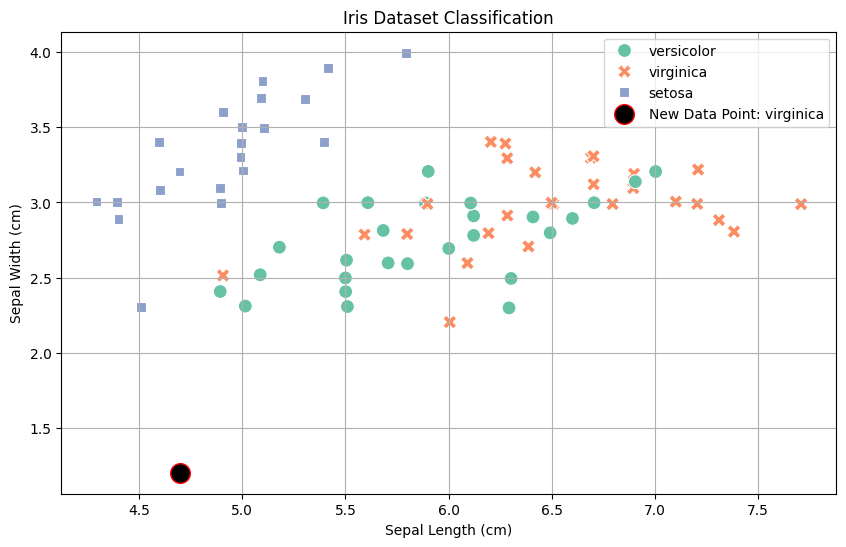

Enter the following features for classification:

Exiting the program.


In [ ]:

def visualize_data(new_data, predicted_class):
    """
    Visualizes the training data and the new data point with its predicted class.

    Parameters:
    new_data (list): The new data point features.
    predicted_class (str): The predicted class name.
    """
    # Convert the training data to a DataFrame for easier plotting
    df = pd.DataFrame(data=X_train, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
    df['Species'] = [target_names[i] for i in y_train]

    plt.figure(figsize=(10, 6))

    # Create a scatter plot
    sns.scatterplot(data=df, x='Sepal Length', y='Sepal Width', hue='Species', style='Species', palette='Set2', s=100)

    # Add the new data point to the plot
    plt.scatter(new_data[0], new_data[1], color='black', s=200, edgecolor='red', label=f'New Data Point: {predicted_class}')

    plt.title('Iris Dataset Classification')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.legend()
    plt.grid()
    plt.show()

# Main loop for continuous input
while True:
    try:
        user_data = get_user_input()
        predicted_class = classify_new_data(user_data)
        print(f"Incoming Data: {user_data}")
        print(f"Predicted Class: {predicted_class}\n")

        # Visualize the data and prediction
        visualize_data(user_data, predicted_class)

    except ValueError:
        print("Invalid input. Please enter numeric values.")
    except KeyboardInterrupt:
        print("\nExiting the program.")
        break